Submission of Sarthak Rastogi (thesarthakrastogi@gmail.com)
for the Data Science Internship at
Brave Artificial Intelligence Laboratory

In [138]:
import pandas as pd
import datetime

In [139]:
df = pd.read_json('interview_dataset_1.json')

In [140]:
df = pd.DataFrame(df)

In [158]:
df.head()

,open,high,low,close,volume,highlowpercentage,percentagechane,dt_year,dt_month,dt_week,dt_day,dt_hour,dt_minute,label
0,1307.00,1307.00,1298.80,1299.05,134,0.631231,-0.608263,2021,2,5,4,9,15,1295.05
1,1299.05,1301.00,1299.05,1300.95,284,0.149890,0.146261,2021,2,5,4,9,16,1293.95
2,1300.95,1301.00,1298.80,1298.80,188,0.169387,-0.165264,2021,2,5,4,9,17,1297.95
3,1298.80,1298.80,1287.00,1287.00,321,0.916861,-0.908531,2021,2,5,4,9,18,1295.00
4,1287.00,1294.45,1287.00,1290.70,48,0.577206,0.287490,2021,2,5,4,9,19,1296.00


In [142]:
df.dtypes

datetime    datetime64[ns, pytz.FixedOffset(330)]
open                                      float64
high                                      float64
low                                       float64
close                                     float64
volume                                      int64
dtype: object

In [143]:
close_px = df['close']
mavg = close_px.rolling(window=50).mean()

Visualising the moving average of the stock prices:

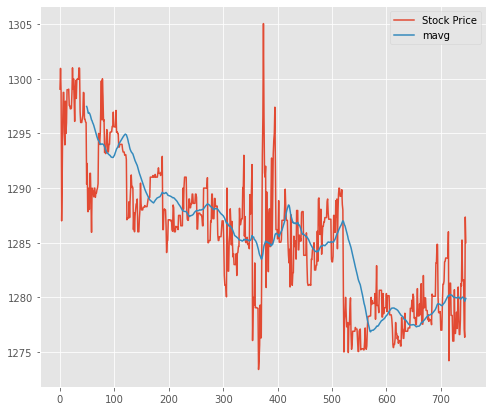

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__
style.use('ggplot')
close_px.plot(label='Stock Price')
mavg.plot(label='mavg')
plt.legend()

In [146]:
df['highlowpercentage'] = (df['high'] - df['low'])/df['close']*100
df['percentagechane'] = (df['close'] - df['open'])/df['open'] *100

In [147]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
df = df.rename(columns = {'datetime': 'dt'})
df.head()

,dt,open,high,low,close,volume,highlowpercentage,percentagechane
0,2021-02-04 09:15:00+05:30,1307.00,1307.00,1298.80,1299.05,134,0.631231,-0.608263
1,2021-02-04 09:16:00+05:30,1299.05,1301.00,1299.05,1300.95,284,0.149890,0.146261
2,2021-02-04 09:17:00+05:30,1300.95,1301.00,1298.80,1298.80,188,0.169387,-0.165264
3,2021-02-04 09:18:00+05:30,1298.80,1298.80,1287.00,1287.00,321,0.916861,-0.908531
4,2021-02-04 09:19:00+05:30,1287.00,1294.45,1287.00,1290.70,48,0.577206,0.287490


In [148]:
df['dt_year'] = df['dt'].dt.year
df['dt_month'] = df['dt'].dt.month
df['dt_week'] = df['dt'].dt.week
df['dt_day'] = df['dt'].dt.day
df['dt_hour'] = df['dt'].dt.hour
df['dt_minute'] = df['dt'].dt.minute

df = df.drop('dt', axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
df.head()

,open,high,low,close,volume,highlowpercentage,percentagechane,dt_year,dt_month,dt_week,dt_day,dt_hour,dt_minute
0,1307.00,1307.00,1298.80,1299.05,134,0.631231,-0.608263,2021,2,5,4,9,15
1,1299.05,1301.00,1299.05,1300.95,284,0.149890,0.146261,2021,2,5,4,9,16
2,1300.95,1301.00,1298.80,1298.80,188,0.169387,-0.165264,2021,2,5,4,9,17
3,1298.80,1298.80,1287.00,1287.00,321,0.916861,-0.908531,2021,2,5,4,9,18
4,1287.00,1294.45,1287.00,1290.70,48,0.577206,0.287490,2021,2,5,4,9,19


In [150]:
import math
import numpy as np
from sklearn import preprocessing

df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
forecast_col = 'close'
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'], 1))
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['label'])
y = y[:-forecast_out]

In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [154]:
poly.score(X_test,y_test)

0.49316410536047317

In [156]:
forecast_set = poly.predict(X_lately)

In [157]:
forecast_set

array([1284.78312346, 1278.244306  , 1279.63902553, 1278.89882489,
       1281.10763776, 1293.37742054, 1293.14356377, 1286.30603113])